# Linear classifiers

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt


## Introduction

- Up until now, our classifiers have been designed based on probability density functions.
- In some cases, these classifiers were equivalent to linear discriminant functions.
- Now, we will design linear discriminant functions, *regardless of the underlying distribution*.
- Linear classifiers are incredibl useful:
    - "First thing you try".
    - Often an underlying part of more complex algorithms.

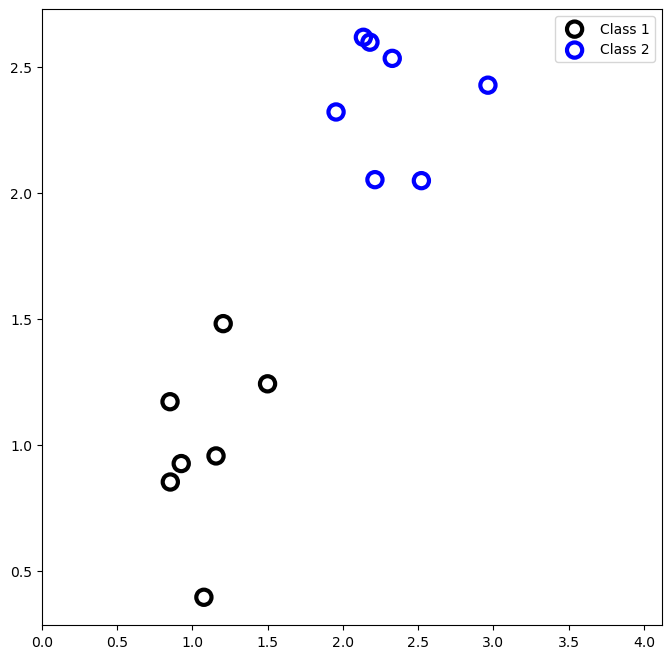

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

N = 7

mu1 = np.array([1, 1])
mu2 = np.array([2.5, 2.5])
sigma = np.array([[0.1, 0.0], [0.0, 0.1]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.xlim(0, np.max(x2[:, 0])+1.5)
plt.xlim(0, np.max(x2[:, 1])+1.5)
plt.legend()
plt.show()

### Linear classifiers: asumptions and notation

- alsdfa

## Mean squared error (MSE) classifier

- Idea:
    - $y()$
    

## Sum of error squares (SE2) classifier

- Drawback of MSE classifier:
    - Assumes knowledge about the underlying distribution -> why not use Bayes' classifier?
    

## Perceptron

- Drawback of MSE classifier:
    - Assumes knowledge about the underlying distribution -> why not use Bayes' classifier?
    